<a href="https://colab.research.google.com/github/dubalker11/darkmatter/blob/main/Ben_Walker_rotation_curve_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import astropy
import numpy as np
import astropy.units as u
import astropy.constants as ac
import matplotlib.pyplot as plt
import astropy.io.ascii

In [2]:
from google.colab import files
uploaded = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [3]:
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")

(0.0, 300.0)

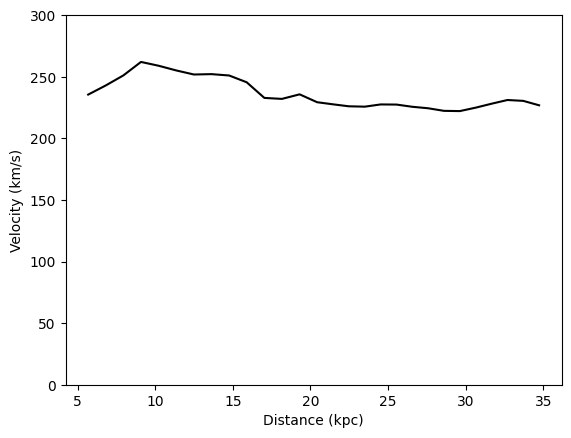

In [4]:
plt.plot(tab["col2"], tab["col3"], color = "black", label = "Data")
plt.xlabel("Distance (kpc)")
plt.ylabel("Velocity (km/s)")
plt.ylim(0, 300)

In [5]:
def calc_rotationalvelocity(mass, radius):
  rotationvelocity = (np.sqrt(ac.G * mass / (radius)))
  return(rotationvelocity.si)

In [6]:
galaxymass = 1e0 * u.earthMass
radius = 1 * u.earthRad
print(calc_rotationalvelocity(galaxymass, radius))

7905.388234385281 m / s


Black Hole


In [7]:
blackholemass = 4e6 * u.solMass
radius_arr = np.array(tab["col2"].data) * 1000 * u.parsec
rotationalvelocity_arr = (calc_rotationalvelocity(blackholemass, radius_arr))

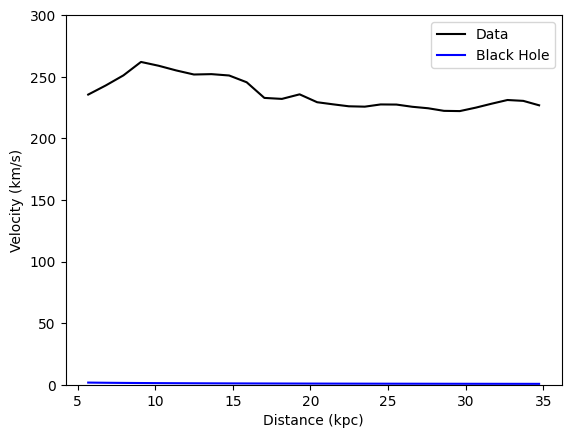

In [8]:
plt.plot(tab["col2"], tab["col3"], color = "black", label = "Data")
plt.plot(radius_arr.value / 1e3, rotationalvelocity_arr.to(u.km / u.s).value, color = "blue", label = "Black Hole")
plt.xlabel("Distance (kpc)")
plt.ylabel("Velocity (km/s)")
plt.ylim(0, 300)
plt.legend()

Bulge

In [9]:
massbulge = 3e10 * u.solMass
radiusbulge = 3e3 * u.parsec
densitybulge = massbulge / (4 * np.pi / 3 * radiusbulge**3)

In [10]:
def calc_bulgemass(density, radius):
  if radius < (2e3 * u.parsec):
    volume = 4 * np.pi / 3 * (radius)**3
    bulge_mass = density * volume
  else:
    bulge_mass = massbulge
  return(bulge_mass)

In [11]:
bulgemass_arr = np.zeros(np.shape(radius_arr)) * u.solMass
for i, radius in enumerate(radius_arr):
  bulgemass_arr[i] = calc_bulgemass(densitybulge, radius_arr[i])
rotationalvelocitybulge_arr = (calc_rotationalvelocity(bulgemass_arr, radius_arr))

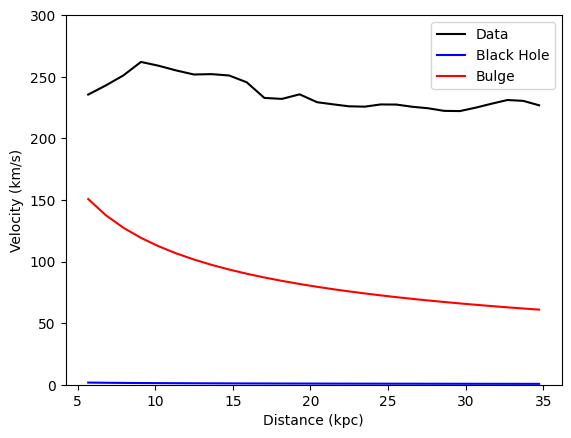

In [12]:
plt.plot(tab["col2"], tab["col3"], color = "black", label = "Data")
plt.plot(radius_arr.value / 1e3, rotationalvelocity_arr.to(u.km / u.s).value, color = "blue", label = "Black Hole")
plt.plot(radius_arr.value / 1e3, rotationalvelocitybulge_arr.to(u.km / u.s).value, color = "red", label = "Bulge")
plt.xlabel("Distance (kpc)")
plt.ylabel("Velocity (km/s)")
plt.ylim(0, 300)
plt.legend()

Disk

In [13]:
diskmass = 8e10 * u.solMass
diskradius = 30e3 * u.parsec
diskdensity = diskmass / (np.pi * diskradius**2)

def calc_diskmass(density, radius):
  area = np.pi * (radius)**2
  diskmass = density * area
  return(diskmass)

In [14]:
diskmass_arr = calc_diskmass(diskdensity , radius_arr)
rotationalvelocitydisk_arr = (calc_rotationalvelocity(diskmass_arr, radius_arr))

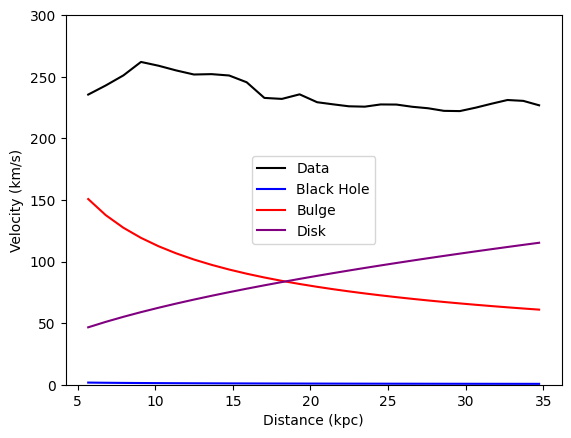

In [15]:
plt.plot(tab["col2"], tab["col3"], color = "black", label = "Data")
plt.plot(radius_arr.value / 1e3, rotationalvelocity_arr.to(u.km / u.s).value, color = "blue", label = "Black Hole")
plt.plot(radius_arr.value / 1e3, rotationalvelocitybulge_arr.to(u.km / u.s).value, color = "red", label = "Bulge")
plt.plot(radius_arr.value / 1e3, rotationalvelocitydisk_arr.to(u.km / u.s).value, color = "purple", label = "Disk")
plt.xlabel("Distance (kpc)")
plt.ylabel("Velocity (km/s)")
plt.ylim(0, 300)
plt.legend()

Dark Matter

In [16]:
def calc_darkmattermass(density, radius):
  volume = 4 * np.pi / 3 * (radius)**3
  darkmattermass = density * volume
  return(darkmattermass)

In [17]:
darkmatterdensity = 1.5e6 * u.solMass / (1000 * u.parsec)**3
darkmattermass_arr = calc_darkmattermass(darkmatterdensity , radius_arr)
rotationalvelocitydarkmatter_arr = (calc_rotationalvelocity(darkmattermass_arr, radius_arr))

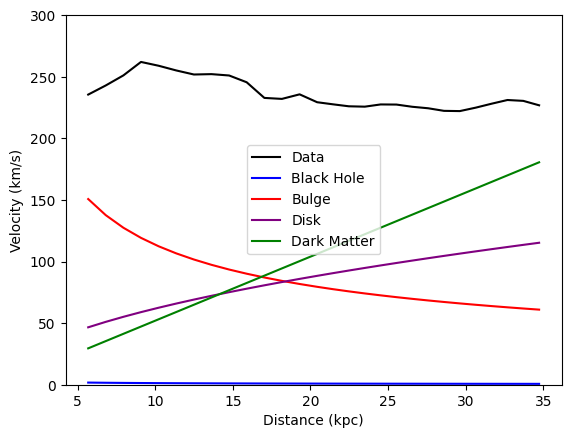

In [18]:
plt.plot(tab["col2"], tab["col3"], color = "black", label = "Data")
plt.plot(radius_arr.value / 1e3, rotationalvelocity_arr.to(u.km / u.s).value, color = "blue", label = "Black Hole")
plt.plot(radius_arr.value / 1e3, rotationalvelocitybulge_arr.to(u.km / u.s).value, color = "red", label = "Bulge")
plt.plot(radius_arr.value / 1e3, rotationalvelocitydisk_arr.to(u.km / u.s).value, color = "purple", label = "Disk")
plt.plot(radius_arr.value / 1e3, rotationalvelocitydarkmatter_arr.to(u.km / u.s).value, color = "green", label = "Dark Matter")
plt.xlabel("Distance (kpc)")
plt.ylabel("Velocity (km/s)")
plt.ylim(0, 300)
plt.legend()

Total

In [19]:
rotationalvelocityall_arr = (calc_rotationalvelocity(darkmattermass_arr + diskmass_arr +
                                                        bulgemass_arr + blackholemass, radius_arr))

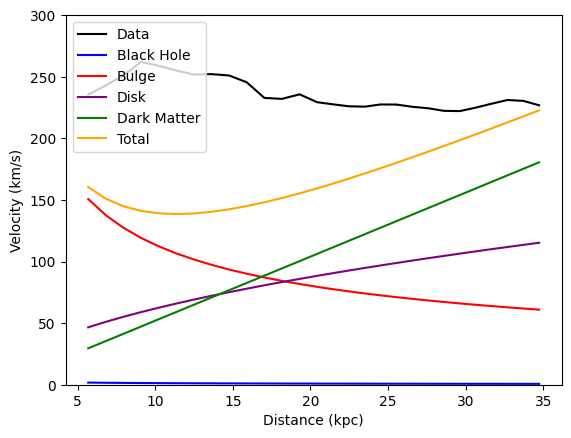

In [20]:
plt.plot(tab["col2"], tab["col3"], color = "black", label = "Data")
plt.plot(radius_arr.value / 1e3, rotationalvelocity_arr.to(u.km / u.s).value, color = "blue", label = "Black Hole")
plt.plot(radius_arr.value / 1e3, rotationalvelocitybulge_arr.to(u.km / u.s).value, color = "red", label = "Bulge")
plt.plot(radius_arr.value / 1e3, rotationalvelocitydisk_arr.to(u.km / u.s).value, color = "purple", label = "Disk")
plt.plot(radius_arr.value / 1e3, rotationalvelocitydarkmatter_arr.to(u.km / u.s).value, color = "green", label = "Dark Matter")
plt.plot(radius_arr.value / 1e3, rotationalvelocityall_arr.to(u.km / u.s).value, color = "orange", label = "Total")
plt.xlabel("Distance (kpc)")
plt.ylabel("Velocity (km/s)")
plt.ylim(0, 300)
plt.legend()